# California House price Data set

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import LinearSVR

from sklearn.model_selection import  GridSearchCV


## 1) Load Data 

In [2]:
housing = pd.read_csv("housing.csv")
housing.head()   # Quick look at data 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [3]:
# Quick description of data 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
# categories in ocean_proximity column
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# Summary of each numerical attribute
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2) Doing some Exploratory Data Analysis 

### 1) Looking for correlations & Scatter plots

In [6]:
housing.iloc[:, :-1].corr()["median_house_value"].sort_values() 

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

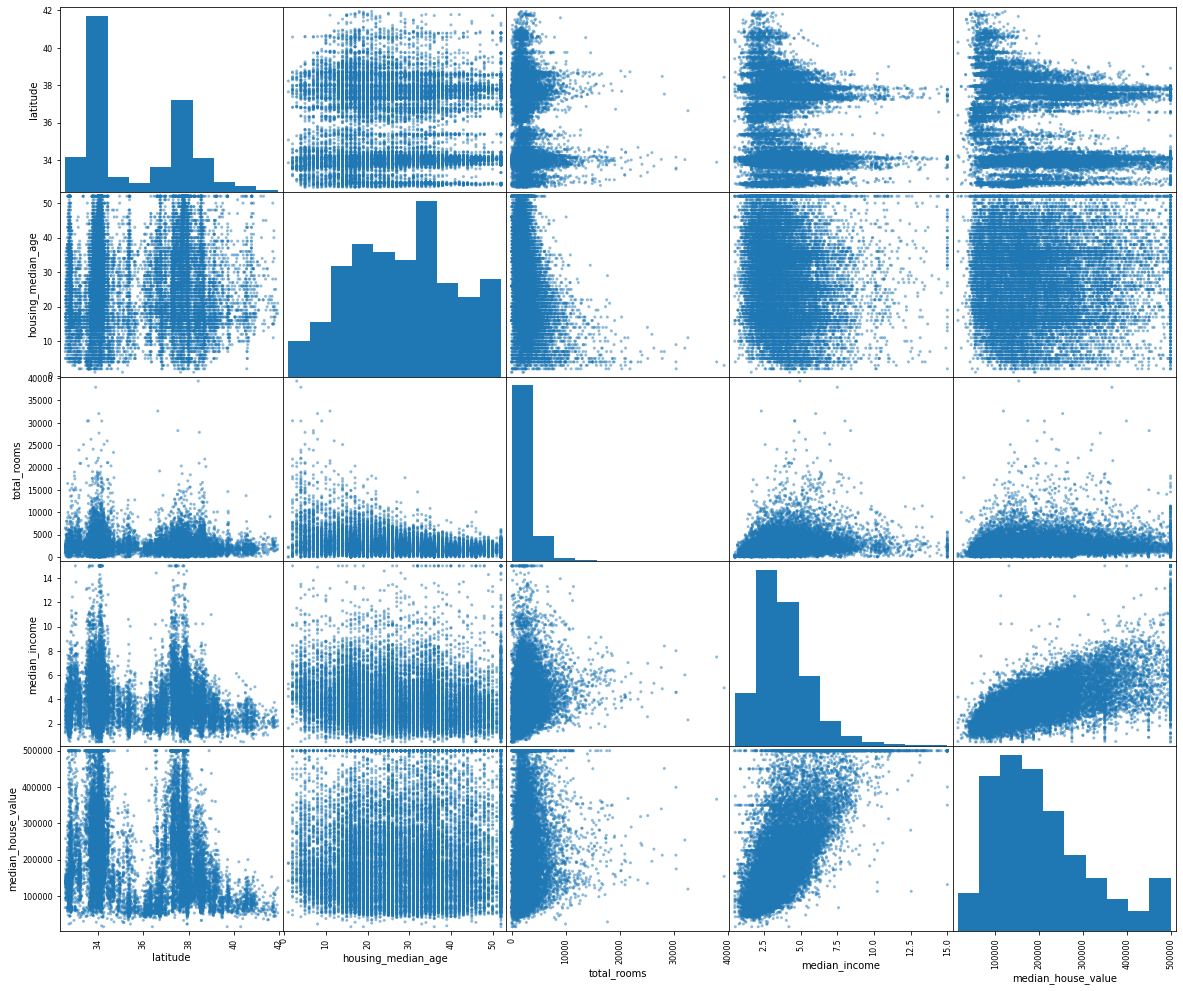

In [7]:
scatter_data = housing.iloc[:, [1, 2, 3, -3, -2]]
pd.plotting.scatter_matrix(scatter_data, figsize=(20, 17)) 
plt.show()

Note 

The plots above drawn shows very strong correlation between median_income and median_house_value

### 2) Experimenting with attribute combinations 

In [8]:
# Create new attributes & Checking correlations
rooms_per_household = housing["total_rooms"]/ housing["households"]
housing["median_house_value"].corr(rooms_per_household)

0.1519482897414578

In [9]:
bedrooms_per_room = housing["total_bedrooms"]/ housing["total_rooms"]
housing["median_house_value"].corr(bedrooms_per_room)

-0.25588014941949805

In [10]:
population_per_household = housing["population"]/ housing["households"]
housing["median_house_value"].corr(population_per_household)

-0.02373741295613434

Note 

We have now two more informative series rooms_per_household &  bedrooms_per_room

### 3) Looking at histograms 

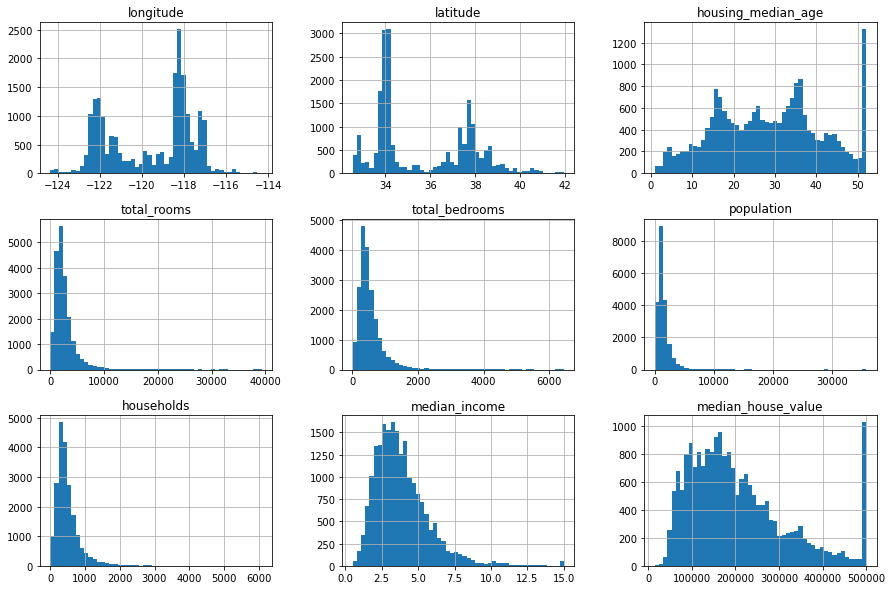

In [11]:
housing.hist(bins=50, figsize=(15, 10))      
plt.show()

Note

1) median_income attribute is capped, can be seen from the histogram

2)housing_median_age and median_house value are also capped, we need to collect proper labels 

## 3) Prepare Data for Machine learning 

### 1) Train test split

In [12]:
# Stratified test train split on the basis of income category 
income_cat = pd.cut(housing["median_income"],
                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                    labels=[1, 2, 3, 4, 5])

train_set, test_set = train_test_split(housing,
                                       test_size=0.2,
                                       random_state=42,
                                       stratify=income_cat)

In [13]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,INLAND
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,NEAR OCEAN
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,INLAND
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,NEAR OCEAN
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,<1H OCEAN


In [14]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29,6447,1012.0,2184,960,8.2816,500001,<1H OCEAN
17352,-120.42,34.89,24,2020,307.0,855,283,5.0099,162500,<1H OCEAN
3505,-118.45,34.25,36,1453,270.0,808,275,4.3839,204600,<1H OCEAN
7777,-118.10,33.91,35,1653,325.0,1072,301,3.2708,159700,<1H OCEAN
14155,-117.07,32.77,38,3779,614.0,1495,614,4.3529,184000,NEAR OCEAN


### 2) Separate labels & features from training set

In [15]:
train_features = train_set.drop("median_house_value", axis=1)
train_labels = train_set["median_house_value"].copy()
train_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,INLAND
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,NEAR OCEAN
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,INLAND
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,NEAR OCEAN
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,<1H OCEAN


In [16]:
train_labels.head()

12655     72100
15502    279600
2908      82700
14053    112500
20496    238300
Name: median_house_value, dtype: int64

### 3) Pipelines & column transformer & Getting prepared training set

In [17]:
# Class to add new columns 

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


# pipeline for numerical attributes 
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),
                        ])


num_attribs = train_features.columns.drop(['ocean_proximity'])
cat_attribs = ["ocean_proximity"]

# Complete pipeline for complete training set transformation
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [18]:
train_prepared = full_pipeline.fit_transform(train_features)
train_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

### 4) Training and evaluating on training set

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [20]:
# Lets check it on few instance of training set
some_data = train_features[:5]
some_labels = train_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
lin_reg.predict(some_data_prepared)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

In [21]:
some_labels

12655     72100
15502    279600
2908      82700
14053    112500
20496    238300
Name: median_house_value, dtype: int64

In [22]:
# Measure Regression model RMSE on whole training set
train_predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_labels, train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

From the above observations on training set, it is clearly showing underfitting on training data , the model is not powerful enough to fix underfitting,one way is to choose more powerful model. let us try with decision tree regressor


# 5) Traning and evaluation on training set with Decision Tree Regressor

In [2]:
destreeregressor  = DecisionTreeRegressor(random_state=0)
destreeregressor.fit(train_prepared, train_labels)

NameError: name 'DecisionTreeRegressor' is not defined

In [24]:
#Measure rmse on whole training set
despred = destreeregressor.predict(train_prepared)
des_mse = mean_squared_error(train_labels,despred)
des_rmse = np.sqrt(des_mse)
des_rmse

0.0

Above observations shows that the Decision  tree model perfectly fits on training  data. so it is
more likely that the model has badlly overfit the data. using  Scikit-learn k-fold cross validation, the following code randomly splits the traing set into 10 distinct subset,called folds, then it trains and evaluates the decision tree model 10 times, picking a different fold for evaluation every time, and training on 9 other folds.

In [25]:
# Cross validation
scores = cross_val_score(estimator=destreeregressor,
                         X=train_prepared,
                         y=train_labels, 
                         scoring='neg_mean_squared_error',
                         cv=10)
tree_rmse_scores=np.sqrt(-scores)
tree_rmse_scores

array([74192.01087724, 70805.54111923, 68475.60360509, 72676.76802934,
       71965.26340482, 77073.0589226 , 71020.57131576, 73752.87175742,
       69171.25474429, 70494.71350146])

In [26]:
def display_score(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard Deviation",scores.std())

In [27]:
display_score(tree_rmse_scores)

Scores [74192.01087724 70805.54111923 68475.60360509 72676.76802934
 71965.26340482 77073.0589226  71020.57131576 73752.87175742
 69171.25474429 70494.71350146]
Mean 71962.76572772507
Standard Deviation 2431.744749773896


In [28]:
#let us calculate the same score for linear regression model:
lin_scores = cross_val_score(estimator=lin_reg,
                            X=train_prepared,
                            y=train_labels,
                            scoring='neg_mean_squared_error',
                            cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_score(lin_rmse_scores)

Scores [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean 69104.07998247063
Standard Deviation 2880.3282098180657


In [29]:
# These clearly shows that Decision tree model is overfiting so badly that it performs worse than linear regression 

# 6) Trying random forest regressor - with defalut value

In [30]:
forest_reg= RandomForestRegressor(random_state=0)
forest_reg.fit(train_prepared, train_labels)

RandomForestRegressor(random_state=0)

In [31]:
# mesure rmse on whole training set
forest_pred = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_labels, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


18849.704643345587

In [32]:
scores = cross_val_score(estimator=forest_reg,
                         X=train_prepared,
                         y=train_labels, 
                         scoring='neg_mean_squared_error',
                         cv=10)
forest_rmse_scores=np.sqrt(-scores)
display_score(forest_rmse_scores)

Scores [51330.39795277 48843.48303663 46859.45617261 52160.29802863
 47152.47432945 51669.41706163 52401.25996679 50014.49815218
 48476.47246524 53464.16111395]
Mean 50237.19182798889
Standard Deviation 2192.212522502259


The score on training set is much lower than the validation sets, that means the model is still overfitting, but this seem to be most promisimg model.

### 7) Hyperparameter tuning on random forest model ,choosing various values of max_features with grid search cv


In [33]:
forest_regx = RandomForestRegressor()
grid_search = GridSearchCV(forest_regx,
                          {'max_features':[6,7,8]},
                          cv=10,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(train_prepared, train_labels)
grid_search.best_params_

{'max_features': 6}

so forest_reg7 is the best now we doing test on it:

# 8) Evaluating on test set

#### 8.1) Separate labels & features from test set

In [34]:
test_features = test_set.drop("median_house_value", axis=1)
test_labels = test_set["median_house_value"].copy()
test_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29,6447,1012.0,2184,960,8.2816,<1H OCEAN
17352,-120.42,34.89,24,2020,307.0,855,283,5.0099,<1H OCEAN
3505,-118.45,34.25,36,1453,270.0,808,275,4.3839,<1H OCEAN
7777,-118.10,33.91,35,1653,325.0,1072,301,3.2708,<1H OCEAN
14155,-117.07,32.77,38,3779,614.0,1495,614,4.3529,NEAR OCEAN


In [35]:
test_labels.head()

5241     500001
17352    162500
3505     204600
7777     159700
14155    184000
Name: median_house_value, dtype: int64

In [36]:
#Preparing test set for prediction: 

In [37]:
test_prep = full_pipeline.transform(test_features)
test_prep

array([[ 0.59229422, -0.71065803,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42180959, -0.35049119, -0.37006852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07211862, -0.56097831,  1.14093342, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83208232, -0.93985512,  0.10708999, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50736927, -0.67791559,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
forest_regr = RandomForestRegressor(random_state=0, max_features=6)
forest_regr.fit(train_prepared, train_labels)
rand_for_pred = forest_regr.predict(test_prep)

In [40]:
# mesure rmse on whole test set

rand_for_mse = mean_squared_error(test_labels, rand_for_pred)
rand_for_rmse = np.sqrt(rand_for_mse)
rand_for_rmse

47103.21429676901

This shows that the RMSE value of test set is less than training set which has the minimum RMSE by using all the above algorithms this shows that the model can relatively predict the data accurately.